# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Datasets/spam_collection.csv')
data.head()

Mounted at /content/drive


,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
data.sample(3)

,sms,label
3231,I feel like a dick because I keep sleeping thr...,0
4514,Money i have won wining number 946 wot do i do...,1
2507,Who u talking about?\n,0


In [ ]:
data.label.value_counts()

0    4827
1     747
Name: label, dtype: int64

# Text preprocessing

In [ ]:
# Lower Case
data['sms']=data['sms'].str.lower()
data.head()

,sms,label
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...\n,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 2) Tokenization
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize
data['sms_token']=data['sms'].apply(lambda X: word_tokenize(X))
data.head()

,sms,label,sms_token
0,"go until jurong point, crazy.. available only ...",0,"[go, until, jurong, point, ,, crazy, .., avail..."
1,ok lar... joking wif u oni...\n,0,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,free entry in 2 a wkly comp to win fa cup fina...,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,u dun say so early hor... u c already then say...,0,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"nah i don't think he goes to usf, he lives aro...",0,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in stopwords.words('english'):
            result.append(token)
            
    return result
data['sms_token'] = data['sms_token'].apply(remove_stopwords )
data['sms_token']

0       [go, jurong, point, ,, crazy, .., available, b...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3       [u, dun, say, early, hor, ..., u, c, already, ...
4       [nah, n't, think, goes, usf, ,, lives, around,...
                              ...                        
5569    [2nd, time, tried, 2, contact, u., u, £750, po...
5570                [ü, b, going, esplanade, fr, home, ?]
5571           [pity, ,, *, mood, ., ..., suggestions, ?]
5572    [guy, bitching, acted, like, 'd, interested, b...
5573                                [rofl, ., true, name]
Name: sms_token, Length: 5574, dtype: object

# Dividing data into Dependent and Independent Values

In [ ]:
X = data['sms_token']
y= data['label']

In [ ]:
# check the shapes of X and y
print('X dimensionality', X.shape)
print('y dimensionality', y.shape)

X dimensionality (5574,)
y dimensionality (5574,)


# Test and Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y)

# Feature Extraction : Count Vectorizer

Fit and Transform : Training data

In [ ]:
print("Extracting features from the training data")
# Create a Vectorizer Object
def dummy(doc):
    return doc
count_vectorizer = CountVectorizer(tokenizer=dummy, preprocessor=dummy,)
# fit_transform together
X_train_cv = count_vectorizer.fit_transform(X_train)
print("n_samples: %d, n_features: %d" % X_train_cv.shape)

Extracting features from the training data
n_samples: 3901, n_features: 7704


In [ ]:
X_train_cv = np.array(X_train_cv.todense())


In [ ]:
# pd.DataFrame(matrix, columns=columns)
pd.DataFrame(X_train_cv, columns=count_vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,!,#,$,%,&,','','an,'comfort,'d,...,é,ü,–,‘,’,“,…,…thanks,〨ud,鈥┾
0,0,2,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Transform : Test data

In [ ]:
X_test_cv = count_vectorizer.transform(X_test)

# Models 

In [ ]:
#set up plotting area
plt.figure(0).clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
# Performance Measures function
def performances(_test,_pred,_prob,_label):
  print('Test Accuracy:', metrics.accuracy_score(_test, _pred))
  print('F1 score:', metrics.f1_score(_test, _pred, average="macro"))
  print('Confusion Matrix : \n', metrics.confusion_matrix(_test, _pred))
  print(metrics.classification_report(_test, _pred, target_names=["Calss 0", "Class 1"]))
  # ROC Curve 
  fpr, tpr, _ = metrics.roc_curve(y_test, _prob)
  auc = round(metrics.roc_auc_score(y_test, _prob), 4)
  plt.plot(fpr,tpr,label= _label+", AUC="+str(auc))

In [ ]:
y_train= np.array(y_train)

## 1)Multinomial Naive Bayes

In [ ]:
# 1.instantiate a Multinomial Naive Bayes model
model_1 = MultinomialNB()

In [ ]:
# 2.train the model 
%time model_1.fit(X_train_cv, y_train)

CPU times: user 291 ms, sys: 0 ns, total: 291 ms
Wall time: 461 ms


MultinomialNB()

Train Score: 0.9958984875672905
Train Score: 0.9958984875672905
Test Accuracy: 0.9778840406455469
F1 score: 0.9503366861545892
Confusion Matrix : 
 [[1441    8]
 [  29  195]]
              precision    recall  f1-score   support

     Calss 0       0.98      0.99      0.99      1449
     Class 1       0.96      0.87      0.91       224

    accuracy                           0.98      1673
   macro avg       0.97      0.93      0.95      1673
weighted avg       0.98      0.98      0.98      1673



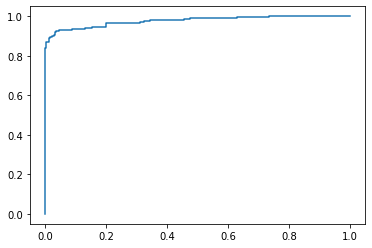

In [ ]:
# 3. make class predictions for X_test
y_pred_1 = model_1.predict(X_test_cv)
# Performance Measures
print('Train Score:', model_1.score(X_train_cv, y_train))
# probablities prediction
y_predprob_1 = model_1.predict_proba(X_test_cv)[:, 1]
print('Train Score:', model_1.score(X_train_cv, y_train))
performances(y_test,y_pred_1,y_predprob_1,'Naive Bayes')

## Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
%time model.fit(X_train_cv,y_train)


CPU times: user 519 ms, sys: 69.7 ms, total: 588 ms
Wall time: 830 ms


GaussianNB()

In [ ]:
y_pred = model.predict(X_test_cv.toarray())
print('Train Score:', model_1.score(X_train_cv, y_train))

Train Score: 0.9958984875672905


Train Score: 0.9500128172263522
Test Accuracy: 0.9001793185893604
F1 score: 0.8221872185786612
Confusion Matrix : 
 [[1307  142]
 [  25  199]]
              precision    recall  f1-score   support

     Calss 0       0.98      0.90      0.94      1449
     Class 1       0.58      0.89      0.70       224

    accuracy                           0.90      1673
   macro avg       0.78      0.90      0.82      1673
weighted avg       0.93      0.90      0.91      1673



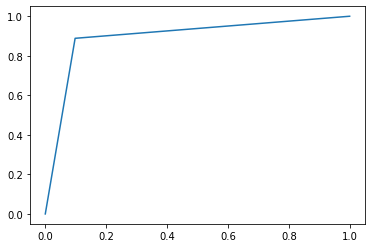

In [ ]:
y_predprob = model.predict_proba(X_test_cv.toarray())[:, 1]
print('Train Score:', model.score(X_train_cv, y_train))
performances(y_test,y_pred,y_predprob,'Gaussian')

## 2) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_2 = DecisionTreeClassifier()

In [ ]:
# 2.train the model 
%time model_2.fit(X_train_cv, y_train)

CPU times: user 19.5 s, sys: 12 ms, total: 19.5 s
Wall time: 23.2 s


DecisionTreeClassifier()

Train Score: 1.0
Train Score: 1.0
Test Accuracy: 0.9623430962343096
F1 score: 0.916438137868867
Confusion Matrix : 
 [[1425   24]
 [  39  185]]
              precision    recall  f1-score   support

     Calss 0       0.97      0.98      0.98      1449
     Class 1       0.89      0.83      0.85       224

    accuracy                           0.96      1673
   macro avg       0.93      0.90      0.92      1673
weighted avg       0.96      0.96      0.96      1673



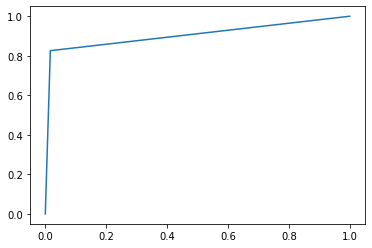

In [ ]:
# 3. make class predictions for X_test
y_pred_2 = model_2.predict(X_test_cv)
print('Train Score:', model_2.score(X_train_cv, y_train))
# probablities prediction
y_predprob_2 = model_2.predict_proba(X_test_cv)[:, 1]
print('Train Score:', model_2.score(X_train_cv, y_train))
performances(y_test,y_pred_2,y_predprob_2,'Decision Tree')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2_b = RandomForestClassifier()
%time model_2_b.fit(X_train_cv,y_train)

CPU times: user 18.5 s, sys: 35.7 ms, total: 18.6 s
Wall time: 18.6 s


RandomForestClassifier()

Train Score: 1.0
Train Score: 1.0
Test Accuracy: 0.976688583383144
F1 score: 0.9456833103985655
Confusion Matrix : 
 [[1449    0]
 [  39  185]]
              precision    recall  f1-score   support

     Calss 0       0.97      1.00      0.99      1449
     Class 1       1.00      0.83      0.90       224

    accuracy                           0.98      1673
   macro avg       0.99      0.91      0.95      1673
weighted avg       0.98      0.98      0.98      1673



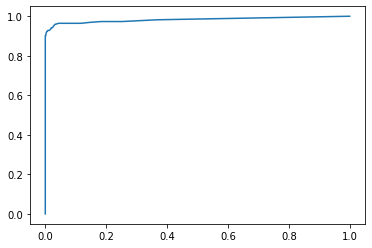

In [ ]:
y_pred = model_2_b.predict(X_test_cv)

print('Train Score:', model_2_b.score(X_train_cv, y_train))
# probablities prediction
y_predprob_2_b = model_2_b.predict_proba(X_test_cv)[:, 1]
print('Train Score:', model_2_b.score(X_train_cv, y_train))
performances(y_test,y_pred,y_predprob_2_b,'Random Forest')

## 3) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_3 = LogisticRegression()

In [ ]:
%time model_3.fit(X_train_cv, y_train)

CPU times: user 3.92 s, sys: 207 ms, total: 4.13 s
Wall time: 2.21 s


LogisticRegression()

Train Score: 0.9966675211484235
Test Accuracy: 0.9808726838015541
F1 score: 0.9564365459102302
Confusion Matrix : 
 [[1447    2]
 [  30  194]]
              precision    recall  f1-score   support

     Calss 0       0.98      1.00      0.99      1449
     Class 1       0.99      0.87      0.92       224

    accuracy                           0.98      1673
   macro avg       0.98      0.93      0.96      1673
weighted avg       0.98      0.98      0.98      1673



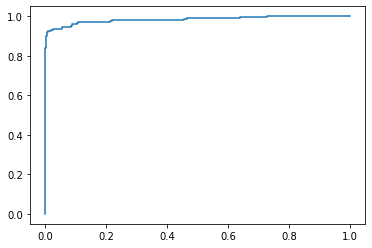

In [ ]:
# 3. make class predictions for X_test
y_pred_3 = model_3.predict(X_test_cv)
# probablities prediction
y_predprob_3 = model_3.predict_proba(X_test_cv)[:, 1]
print('Train Score:', model_3.score(X_train_cv, y_train))
performances(y_test,y_pred_3,y_predprob_3,'Logistic Regression')

## 4) KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_4 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
%time model_4.fit(X_train_cv, y_train)

CPU times: user 3.26 ms, sys: 14 µs, total: 3.28 ms
Wall time: 3.66 ms


KNeighborsClassifier(n_neighbors=3)

Train Score: 0.9966675211484235
Train Score: 0.9451422712125096
Test Accuracy: 0.9270771069934249
F1 score: 0.7938123292763742
Confusion Matrix : 
 [[1448    1]
 [ 121  103]]
              precision    recall  f1-score   support

     Calss 0       0.92      1.00      0.96      1449
     Class 1       0.99      0.46      0.63       224

    accuracy                           0.93      1673
   macro avg       0.96      0.73      0.79      1673
weighted avg       0.93      0.93      0.92      1673



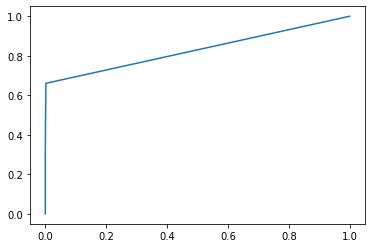

In [ ]:
y_pred_4 = model_4.predict(X_test_cv)
print('Train Score:', model_3.score(X_train_cv, y_train))
# probablities prediction
y_predprob_4 = model_4.predict_proba(X_test_cv)[:, 1]
print('Train Score:', model_4.score(X_train_cv, y_train))
performances(y_test,y_pred_4,y_predprob_4,'KNN Classifier')